#### Assignment :  Identification of Good and Bad customer of car loans. 

#### Introduction 

##### Problem Statement :
A fintech company disbursed car loans to customers. As the loans aged, some customers turned bad while others are performing good.

With the given dataset of good and bad customers along with loan and customer attributes, we need to extract the insights from the data which explains the characteristics of good and bad customers.

##### Dataset:  
Given dataset contains the   10000     observations and  49   features.

##### Attributes :


UID	                    Unique customer ID

CUSTOMER_PROFILE_CODE	Profile of customers 

Good_Bad	            Customer turned Bad or Good

LOCATIONNAME	        Location name

VEHICLEMODEL	        Vehicle Model

ASSETCOST	            Asset cost

LOANAMOUNT	            Loan Amount

EMI	                    EMI

TENURE	                Tenure

ADDRESSCONFIRMED	    Address confirmed

DESIGNATION	            Applicant Designation

RESIDENCETYPE	        Residence type

NOOFYEARSINSAMECITY	    No. of years in same city

RESIDENCESTABILITY	    Residence stability

RESIDENCELOCALITY	    Residence locality

BUSINESSCATEGORY	    Business category

BUSINESSMARGINGROSS	    Business margin gross

INCOMEEMPLOYMENT	    Income employment

STABILITYINBUSINESS	    Stability in business

STABILITYCONFIRMED	    Stability confirmed

STABILTIYCONFIRMEDTHRU	Who confirmed the stability

ISFAMILYINVOLVED	    Is family involved

OFFICETYPE	            Office type

MONTHLYTURNOVER	        Monthly turn over

STOCKVALUEINHAND	    Stock value in hand

BUSINESSMARGINNET	    Business margin net

NOOFEMPLOYEES	        No. of employees

NAMEBOARDSEEN	        Name board seen

OFFICELOCALITY	        Locality of customer office

ISRESIDENCECOMEOFFICE	Is residence cum office?

ENDUSEOFLOAN	        End use of loan

ENDUSEOFASSET	        End use of Asset

ASSETLOCATION	        Asset location

NEIGHBOURREF	        Neighbour reference

POLITICALLINK	        Political link

PROFESSIONTYPE	        Profession type

CURRENTBUSINESSSTABILITY	Current business stability

APPLICANTDESIGNATION	Applicant designation

ASSETREGMONTH	        Asset registration month

ASSETREGYEAR	        Asset registration year

LANDOWNERSHIP	        Land ownership

IRRIGATIONSOURCE	    Irrigation source

CROPSCULTIVATED	        Crops cultivated

DISTFROMSCELOCATION	    Distance from SCE location

DISTFROMDEALERLOCATION	Distance from Dealer location

IMGCONFIRM	            Image confirm

TOTALEXPENSEPERMONTH	Total expenses per month

NETINCOMEPERMONTH	    Netincome per month

FOIR	                Fixed income obligation & expenses ratio


**Target Column** - Good_bad

**Problem statement:**
Deliverables: 

1. Code/Notebook of EDA.

2. Feature Engineering/Feature Preparation

3. Mention insights from data in Notebook.

In [914]:
#importing necessary libraries
from __future__ import division , print_function
# Load libraries
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Numerical libraries
import numpy as np   

#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns


from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')



#Statistical library
from scipy.stats import norm

In [831]:
#Loading Dataset
df = pd.read_csv("assignment.csv")

### Deliverable 1 :Exploratory Data Analysis

In [832]:
#let's check first few rows of dataset
df.head()

,UID,Good_Bad,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,...,ASSETREGYEAR,LANDOWNERSHIP,IRRIGATIONSOURCE,CROPSCULTIVATED,DISTFROMSCELOCATION,DISTFROMDEALERLOCATION,IMGCONFIRM,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH,FOIR
0,1,Bad,PROF270,MADURAI,HONDA CITY 1.5 GXI PETROL 2008,900000.0,350000.0,13369.0,36.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,80000.0,17
1,2,Good,PROF218,KOLKATA,MARUTI SUZUKI EECO 7 STR PETROL 2011,400000.0,125250.0,5428.0,30.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,8000.0,27000.0,20
2,3,Good,PROF305,NAGPUR,MARUTI SUZUKI SWIFT VDI DIESEL 2013,450000.0,329250.0,8536.0,60.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,50000.0,17
3,4,Good,PROF356,AHMEDABAD,FORD ENDEAVOUR XLT 4X2 DIESEL 2008,600000.0,300000.0,11084.0,36.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,0.0,60000.0,18
4,5,Bad,PROF300,NAGPUR,MARUTI SUZUKI SWIFT DZIRE VDI BS IV DIESEL 2013,550000.0,429250.0,15898.0,36.0,Y,...,0.0,NaN,NaN,NaN,0.0,0.0,Y,10000.0,30000.0,53


In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
UID                         10000 non-null int64
Good_Bad                    10000 non-null object
CUSTOMER_PROFILE_CODE       10000 non-null object
LOCATIONNAME                9872 non-null object
VEHICLEMODEL                9853 non-null object
ASSETCOST                   9855 non-null float64
LOANAMOUNT                  9855 non-null float64
EMI                         9855 non-null float64
TENURE                      9855 non-null float64
ADDRESSCONFIRMED            9855 non-null object
DESIGNATION                 9780 non-null object
RESIDENCETYPE               9758 non-null object
NOOFYEARSINSAMECITY         9758 non-null float64
RESIDENCESTABILITY          9781 non-null float64
RESIDENCELOCALITY           9778 non-null float64
BUSINESSCATEGORY            9777 non-null object
BUSINESSMARGINGROSS         9881 non-null float64
INCOMEEMPLOYMENT            9852 non-null float64

In [834]:
#number of rows and columns in dataset
df.shape

(10000, 49)

In [835]:
# Let us look at the target column which is 'Good_Bad' to understand how the data is distributed amongst the various values

df.groupby(["Good_Bad"]).count()

,UID,CUSTOMER_PROFILE_CODE,LOCATIONNAME,VEHICLEMODEL,ASSETCOST,LOANAMOUNT,EMI,TENURE,ADDRESSCONFIRMED,DESIGNATION,...,ASSETREGYEAR,LANDOWNERSHIP,IRRIGATIONSOURCE,CROPSCULTIVATED,DISTFROMSCELOCATION,DISTFROMDEALERLOCATION,IMGCONFIRM,TOTALEXPENSEPERMONTH,NETINCOMEPERMONTH,FOIR
Good_Bad,,,,,,,,,,,,,,,,,,,,,
Bad,3248,3248,3248,3247,3248,3248,3248,3248,3248,3235,...,3208,0,0,0,3208,3208,3240,2939,2939,3248
Good,6752,6752,6624,6606,6607,6607,6607,6607,6607,6545,...,6578,0,0,0,6578,6578,6598,6212,6212,6752


**Description : Out of 10000 customers in the dataset , 6750 are the good customers labeled by the fintech company while 3248 are labeled as Bad customers**

In [836]:
#dropping the column UID and CUSTOMER_PROFILE_CODE
#df.drop(['UID','CUSTOMER_PROFILE_CODE'],axis =1)
df1 = df.drop(columns =['UID', 'CUSTOMER_PROFILE_CODE']) 

In [837]:
df1.shape

#now we have 47 features

(10000, 47)

In [838]:
###checking the general distribution
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ASSETCOST,9855.0,528725.406799,3.183957e+05,0.0,300000.0,475000.0,650000.0,7.200000e+06
LOANAMOUNT,9855.0,387004.621816,2.386860e+05,50000.0,224125.0,350000.0,500000.0,3.512750e+06
EMI,9855.0,12234.161542,6.718608e+03,1402.0,7750.0,11114.0,14918.0,1.030000e+05
TENURE,9855.0,45.119432,1.217902e+01,12.0,36.0,48.0,60.0,6.000000e+01
NOOFYEARSINSAMECITY,9758.0,26.650618,1.408849e+01,0.0,20.0,25.0,35.0,4.010000e+02
RESIDENCESTABILITY,9781.0,78.625360,4.424230e+03,0.0,8.0,20.0,30.0,4.110140e+05
RESIDENCELOCALITY,9778.0,3.053385,5.158957e-01,0.0,3.0,3.0,3.0,6.000000e+00
BUSINESSMARGINGROSS,9881.0,8.111831,2.096219e+01,0.0,0.0,0.0,0.0,1.000000e+02
INCOMEEMPLOYMENT,9852.0,160021.331580,5.049913e+06,0.0,40000.0,59000.0,100000.0,5.000000e+08
STABILITYINBUSINESS,9888.0,14.963028,3.017083e+02,0.0,5.0,10.0,15.0,3.000000e+04


In [859]:
#cross tabulation for 'isfamilyinvolved' and target column.
pd.crosstab(df1['ISFAMILYINVOLVED'],df1['Good_Bad'])

Good_Bad,Bad,Good
ISFAMILYINVOLVED,,
0,0,17
N,2307,5051
Y,941,1553


In [862]:
#cross tabulation for 'RESIDENCETYPE ' and target column.
pd.crosstab(df1['RESIDENCETYPE'],df1['Good_Bad'])

Good_Bad,Bad,Good
RESIDENCETYPE,,
L,40,115
O,2799,5508
R,388,905


In [864]:
#cross tabulation for 'BUSINESSCATEGORY ' and target column.
pd.crosstab(df1['BUSINESSCATEGORY'],df1['Good_Bad'])

Good_Bad,Bad,Good
BUSINESSCATEGORY,,
0,0,12
PR001,105,322
PR002,211,814
PR003,85,177
PR004,84,179
PR005,1772,3443
PR006,444,820
PR007,310,427
PR008,88,117


**Insight: Businesscategory PR004 has the maximum number of customer both bad and good.Interestingly the observations with value 0 has no Bad customer and 12  good customer,might possible all these 12 belongs to same Businesscategory.**

### Deliverable 2 : Feature Engineering/Feature Preparation:

**After closely examined the dataset i have found that there exist an observation which has 708 value in every column.I am using the following code to delete that specific column before proceeding data prepration**

In [853]:
df1= df.drop(df.index[708])
df1.shape

(9869, 49)

In [854]:
df1 = df1.dropna(axis=0, subset=['LOCATIONNAME'])
df1.shape
#deleting those observation which have na in all the columns


(9869, 49)

**Description: A very interesting insight i've got by close analysis of dataset is that there are total of 128 observations which has almost null value in every column. So by the above code i have dropped those observations by using the feature ' LOCATIONNAME'.**  

**Checking the prescence of missing values**

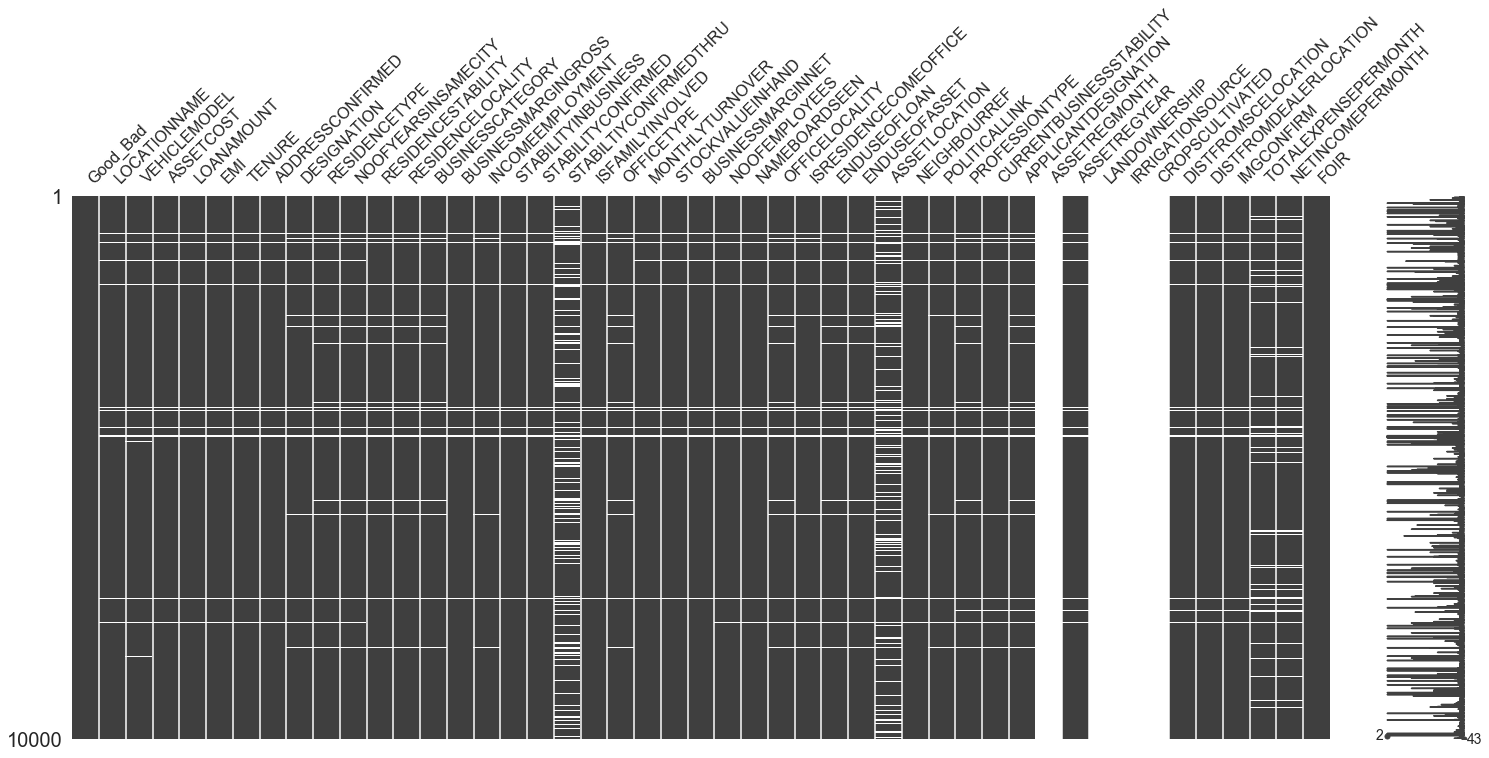

In [844]:
import missingno as msno
msno.matrix(df1)

Missing data visualisation. White fields indicate NA’s

In [845]:
df1.isnull().sum()


Good_Bad                        0
LOCATIONNAME                  128
VEHICLEMODEL                  147
ASSETCOST                     145
LOANAMOUNT                    145
EMI                           145
TENURE                        145
ADDRESSCONFIRMED              145
DESIGNATION                   220
RESIDENCETYPE                 242
NOOFYEARSINSAMECITY           242
RESIDENCESTABILITY            219
RESIDENCELOCALITY             222
BUSINESSCATEGORY              223
BUSINESSMARGINGROSS           119
INCOMEEMPLOYMENT              148
STABILITYINBUSINESS           112
STABILITYCONFIRMED            107
STABILTIYCONFIRMEDTHRU       1800
ISFAMILYINVOLVED              110
OFFICETYPE                    224
MONTHLYTURNOVER               109
STOCKVALUEINHAND              109
BUSINESSMARGINNET             113
NOOFEMPLOYEES                 126
NAMEBOARDSEEN                 126
OFFICELOCALITY                242
ISRESIDENCECOMEOFFICE         180
ENDUSEOFLOAN                  249
ENDUSEOFASSET 

##### Description :  As we can see from the above output 4 features have NAN every obersvation i.e  ASSETREGMONTH ,LANDOWNERSHIP             IRRIGATIONSOURCE  and CROPSCULTIVATED .So it's good idea to drop these .

In [846]:
df1 = df1.drop(columns = ['ASSETREGMONTH','LANDOWNERSHIP','IRRIGATIONSOURCE','CROPSCULTIVATED','STABILITYCONFIRMED',
                         'BUSINESSMARGINGROSS','DISTFROMSCELOCATION','DISTFROMDEALERLOCATION','ASSETREGYEAR'])

In [807]:
df1.drop(df1.loc[df1['LOCATIONNAME']== 4].index, inplace=True)
df1.drop(df1.loc[df1['LOCATIONNAME']== 7].index, inplace=True)
df1.drop(df1.loc[df1['LOCATIONNAME']== 8].index, inplace=True)

In [808]:
df1.shape

(9871, 38)

**Treatment of missing values:**
1.Numerical NaNs
A standard and often very good approach is to replace the missing values with mean, median or mode. For numerical values we should go with mean.

2.Categorical NaNs
Categorical values can be a bit trickier, so we should definitely pay attention to our model performance metrics after editing (compare before and after). The standard thing to do is to replace the missing entry with the most frequent one.

In [727]:
#replacing NaN (numerical) with mean
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['ASSETCOST']] = imputer.fit_transform(df1[['ASSETCOST']])

In [728]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['LOANAMOUNT']] = imputer.fit_transform(df1[['LOANAMOUNT']])

In [729]:
#replacing NaN (numerical) with median

imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
df1[['EMI']] = imputer.fit_transform(df1[['EMI']])

In [730]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['TENURE']] = imputer.fit_transform(df1[['TENURE']])

In [731]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['NOOFYEARSINSAMECITY']] = imputer.fit_transform(df1[['NOOFYEARSINSAMECITY']])

In [732]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['RESIDENCESTABILITY']] = imputer.fit_transform(df1[['RESIDENCESTABILITY']])

In [733]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['RESIDENCELOCALITY']] = imputer.fit_transform(df1[['RESIDENCELOCALITY']])

In [734]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['INCOMEEMPLOYMENT']] = imputer.fit_transform(df1[['INCOMEEMPLOYMENT']])

In [735]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['STABILITYINBUSINESS']] = imputer.fit_transform(df1[['STABILITYINBUSINESS']])

In [736]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['STABILTIYCONFIRMEDTHRU']] = imputer.fit_transform(df1[['STABILTIYCONFIRMEDTHRU']])

In [737]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['MONTHLYTURNOVER']] = imputer.fit_transform(df1[['MONTHLYTURNOVER']])

In [738]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['STOCKVALUEINHAND']] = imputer.fit_transform(df1[['STOCKVALUEINHAND']])

In [739]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['ENDUSEOFASSET']] = imputer.fit_transform(df1[['ENDUSEOFASSET']])

In [740]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['CURRENTBUSINESSSTABILITY']] = imputer.fit_transform(df1[['CURRENTBUSINESSSTABILITY']])

In [741]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['TOTALEXPENSEPERMONTH']] = imputer.fit_transform(df1[['TOTALEXPENSEPERMONTH']])    

In [742]:
#replacing NaN (numerical) with mean

imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
df1[['NETINCOMEPERMONTH']] = imputer.fit_transform(df1[['NETINCOMEPERMONTH']])  

##### Categorical NaNs
Categorical values can be a bit trickier, so you should definitely pay attention to your model performance metrics after editing (compare before and after). The standard thing to do is to replace the missing entry with the most frequent one:


In [743]:
#using this lambda function 
df_new = df1.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [744]:
#checking the presence of null values again
df_new.isnull().sum()

Good_Bad                    0
LOCATIONNAME                0
VEHICLEMODEL                0
ASSETCOST                   0
LOANAMOUNT                  0
EMI                         0
TENURE                      0
ADDRESSCONFIRMED            0
DESIGNATION                 0
RESIDENCETYPE               0
NOOFYEARSINSAMECITY         0
RESIDENCESTABILITY          0
RESIDENCELOCALITY           0
BUSINESSCATEGORY            0
INCOMEEMPLOYMENT            0
STABILITYINBUSINESS         0
STABILTIYCONFIRMEDTHRU      0
ISFAMILYINVOLVED            0
OFFICETYPE                  0
MONTHLYTURNOVER             0
STOCKVALUEINHAND            0
BUSINESSMARGINNET           0
NOOFEMPLOYEES               0
NAMEBOARDSEEN               0
OFFICELOCALITY              0
ISRESIDENCECOMEOFFICE       0
ENDUSEOFLOAN                0
ENDUSEOFASSET               0
ASSETLOCATION               0
NEIGHBOURREF                0
POLITICALLINK               0
PROFESSIONTYPE              0
CURRENTBUSINESSSTABILITY    0
APPLICANTD

#### Univariate Analysis:
**Checking the presence of outliers And distribution of data in each variable : Using Boxplot for outliers, Distplot and histogram for data distribution**


In [745]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9871 entries, 0 to 9999
Data columns (total 38 columns):
Good_Bad                    9871 non-null object
LOCATIONNAME                9871 non-null object
VEHICLEMODEL                9871 non-null object
ASSETCOST                   9871 non-null float64
LOANAMOUNT                  9871 non-null float64
EMI                         9871 non-null float64
TENURE                      9871 non-null float64
ADDRESSCONFIRMED            9871 non-null object
DESIGNATION                 9871 non-null object
RESIDENCETYPE               9871 non-null object
NOOFYEARSINSAMECITY         9871 non-null float64
RESIDENCESTABILITY          9871 non-null float64
RESIDENCELOCALITY           9871 non-null float64
BUSINESSCATEGORY            9871 non-null object
INCOMEEMPLOYMENT            9871 non-null float64
STABILITYINBUSINESS         9871 non-null float64
STABILTIYCONFIRMEDTHRU      9871 non-null float64
ISFAMILYINVOLVED            9871 non-null object
O

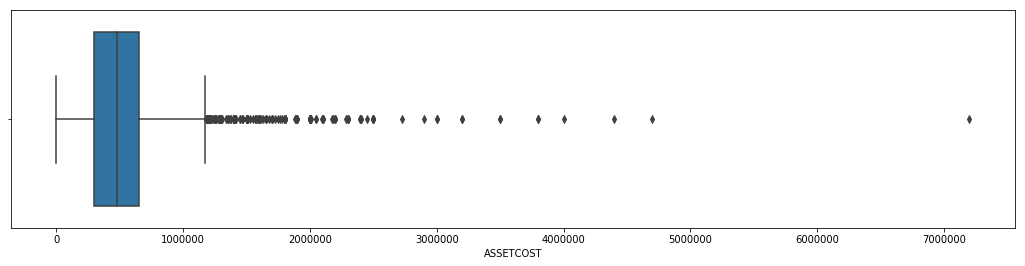

In [746]:
#Boxplot for ASSETCOST
plt.figure(figsize=(18,4))
sns.boxplot(x=df_new["ASSETCOST"])

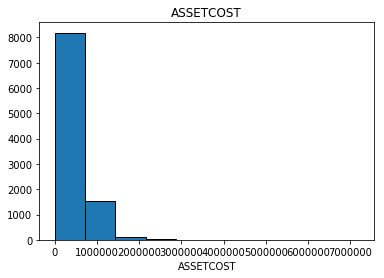

In [747]:
##frequency distribution of ASSETCOST
plt.hist(df_new.ASSETCOST,  edgecolor='black')
plt.title('ASSETCOST')
plt.xlabel('ASSETCOST')
plt.show()

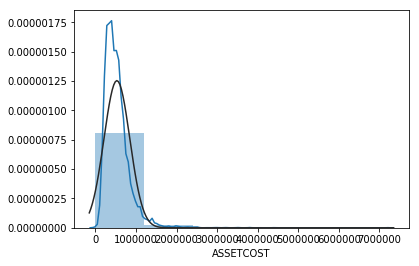

In [748]:
#seaborn distplot for ASSETCOST ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(df_new['ASSETCOST'],6,fit = norm)

**Description: Huge  outliers in right side of distribution and the distribution looks right skewed**

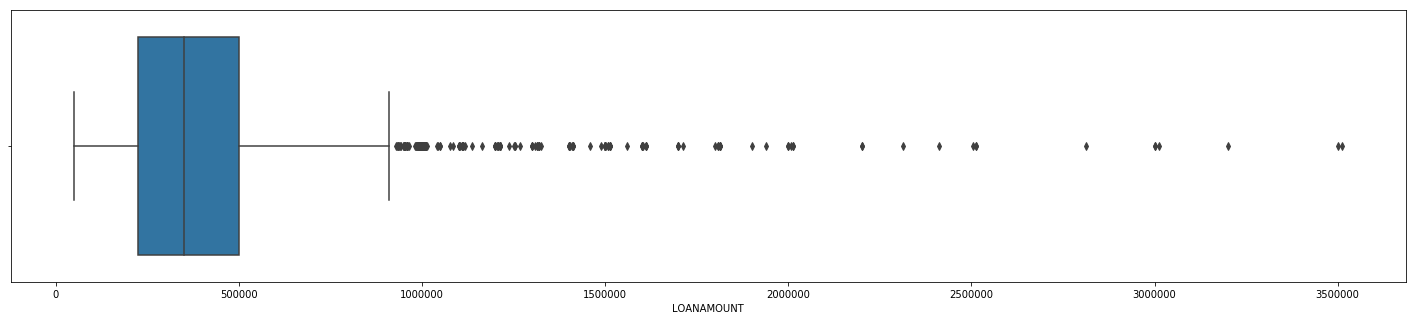

In [749]:
plt.figure(figsize=(25,5))
sns.boxplot(x=df_new["LOANAMOUNT"])

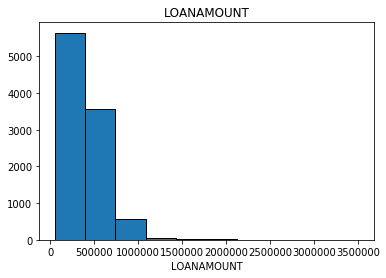

In [750]:
##frequency distribution of LOANAMOUNT
plt.hist(df_new.LOANAMOUNT,  edgecolor='black')
plt.title('LOANAMOUNT')
plt.xlabel('LOANAMOUNT')
plt.show()

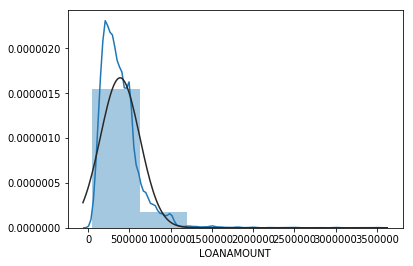

In [751]:
#seaborn distplot for ASSETCOST ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(df_new['LOANAMOUNT'],6,fit = norm)

**Description:Huge outliers in right side of distribution and the distribution looks right skewed**

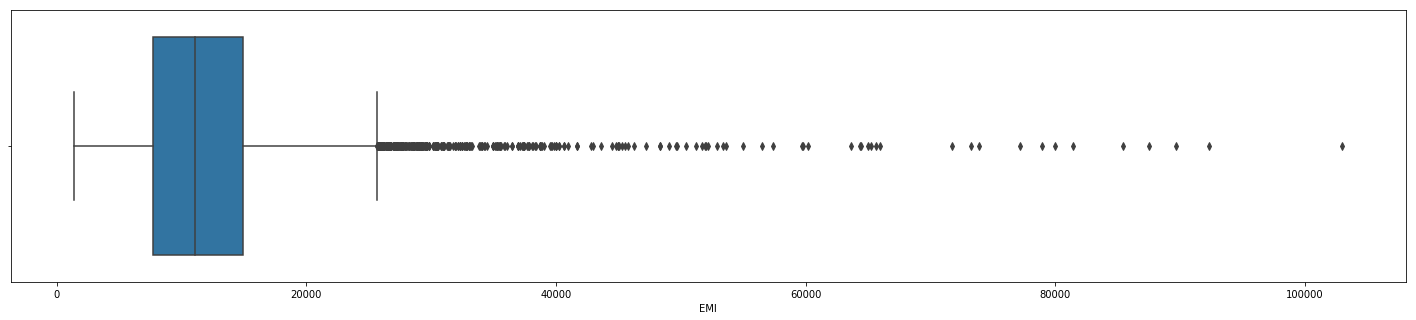

In [752]:
#Boxplot for EMI
plt.figure(figsize=(25,5))
sns.boxplot(x=df_new["EMI"])

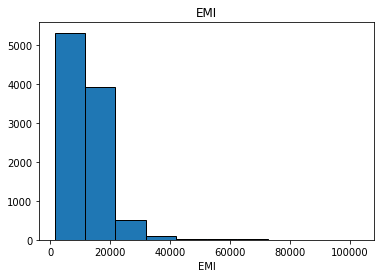

In [753]:
##frequency distribution of EMI
plt.hist(df_new.EMI,  edgecolor='black')
plt.title('EMI')
plt.xlabel('EMI')
plt.show()

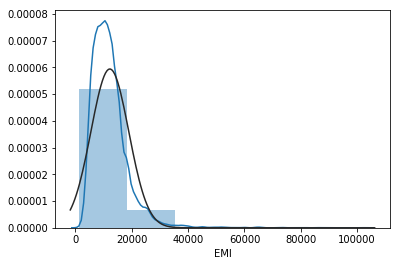

In [754]:
#seaborn distplot for EMI ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(df_new['EMI'],6,fit = norm)

**Description: Huge outliers on the right side of distribution**

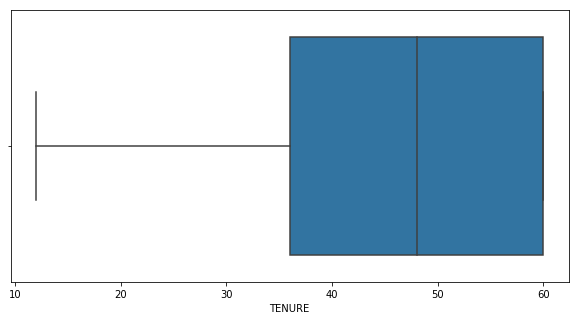

In [755]:
#Boxplot for TENURE
plt.figure(figsize=(10,5))
sns.boxplot(x=df_new["TENURE"])

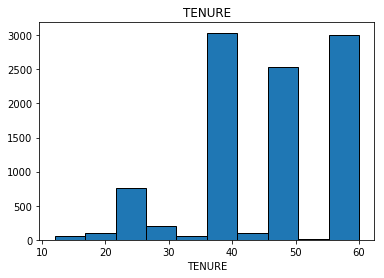

In [756]:
##frequency distribution of TENURE
plt.hist(df_new.TENURE,  edgecolor='black')
plt.title('TENURE')
plt.xlabel('TENURE')
plt.show()

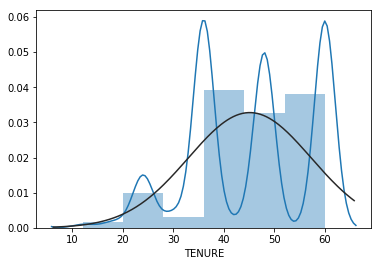

In [757]:
#seaborn distplot for TENURE ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(df_new['TENURE'],6,fit = norm)

**Description: No outliers but distribution is not normal.**

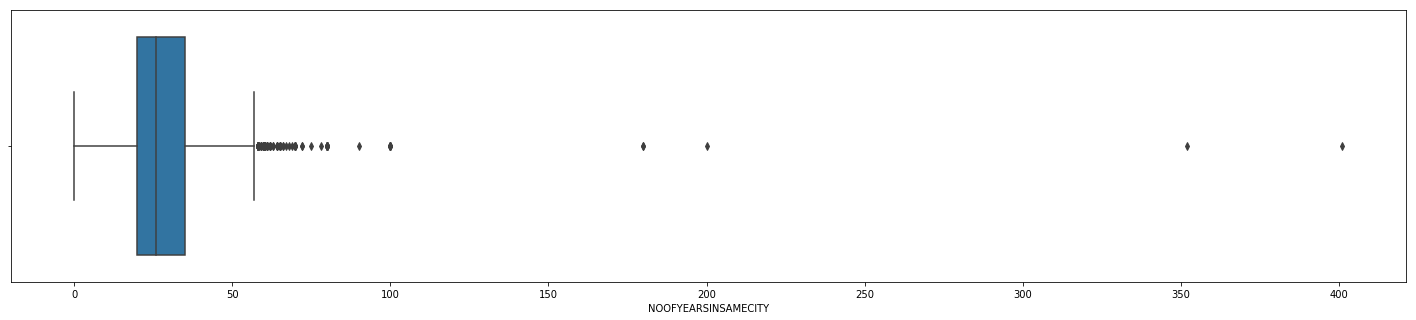

In [758]:
#Boxplot for NOOFYEARSINSAMECITY
plt.figure(figsize=(25,5))
sns.boxplot(x=df_new["NOOFYEARSINSAMECITY"])

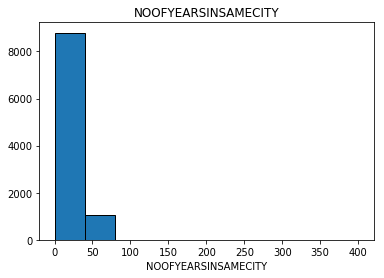

In [759]:
##frequency distribution NOOFYEARSINSAMECITY
plt.hist(df_new.NOOFYEARSINSAMECITY,  edgecolor='black')
plt.title('NOOFYEARSINSAMECITY')
plt.xlabel('NOOFYEARSINSAMECITY')
plt.show()

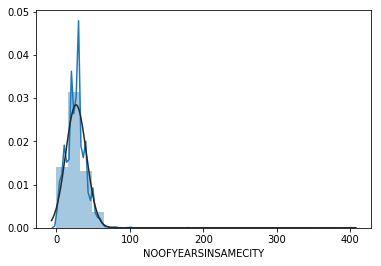

In [760]:
#seaborn distplot for NOOFYEARSINSAMECITY ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(df_new['NOOFYEARSINSAMECITY'],25,fit = norm)

**Description: Huge outliers on the right side of distribution and distribution is close  to normal**

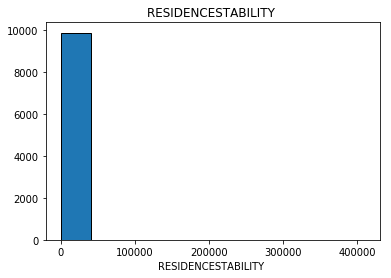

In [761]:
##frequency distribution RESIDENCESTABILITY 
plt.hist(df_new.RESIDENCESTABILITY ,  edgecolor='black')
plt.title('RESIDENCESTABILITY ')
plt.xlabel('RESIDENCESTABILITY ')
plt.show()

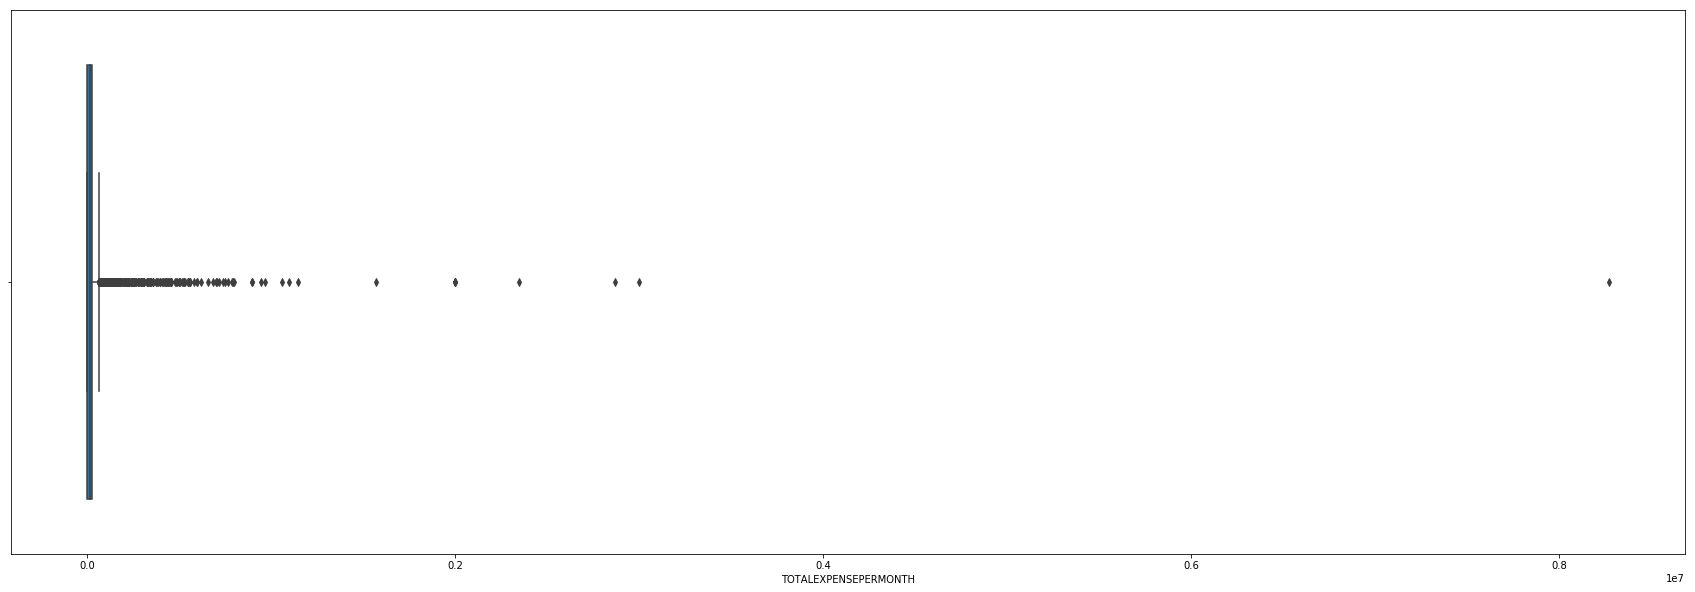

In [762]:

#Boxplot for TOTALEXPENSEPERMONTH  
plt.figure(figsize=(30,10))
sns.boxplot(x=df_new["TOTALEXPENSEPERMONTH"])


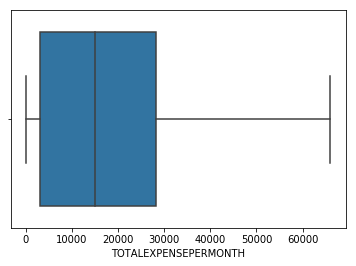

In [763]:
sns.boxplot(x="TOTALEXPENSEPERMONTH",data= df_new, showfliers=False)

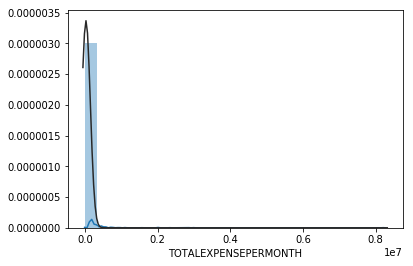

In [764]:
#seaborn distplot for  TOTALEXPENSEPERMONTH  ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(df_new['TOTALEXPENSEPERMONTH'],25,fit = norm)

AxesSubplot(0.125,0.125;0.775x0.755)


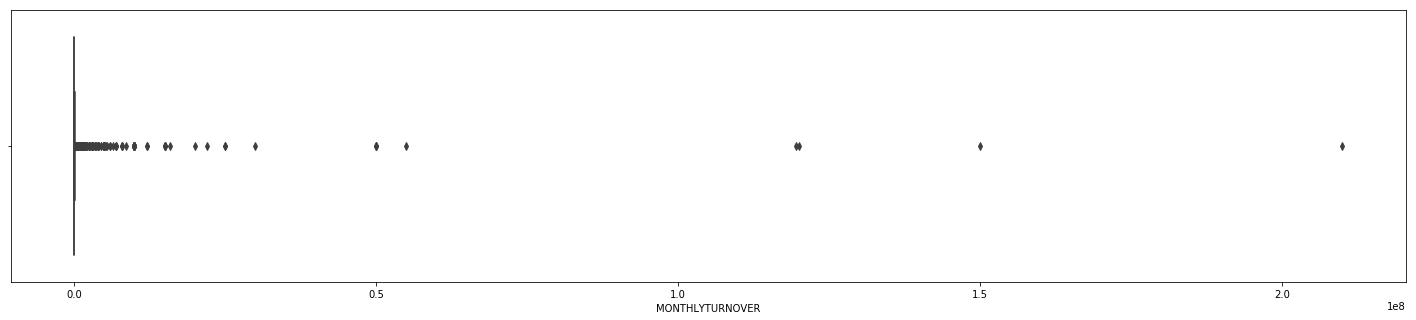

In [765]:
#Boxplot for Monthly Turnover
plt.figure(figsize=(25,5))
print(sns.boxplot(x=df_new["MONTHLYTURNOVER"]))


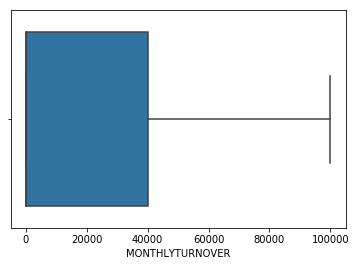

In [766]:
sns.boxplot(x="MONTHLYTURNOVER",data= df_new, showfliers=False)

**Description: Huge outliers in the right side of distribution and this is the reason why first boxplot is not showing whiskers As in the second boxplot i have use showfliers = false**

AxesSubplot(0.125,0.125;0.775x0.755)


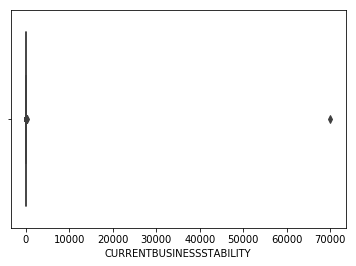

In [767]:
#Boxplot for current business stability
#plt.figure(figsize=(25,5))
print(sns.boxplot(x=df_new["CURRENTBUSINESSSTABILITY"]))


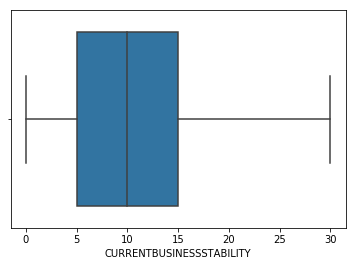

In [768]:
sns.boxplot(x="CURRENTBUSINESSSTABILITY",data= df_new, showfliers=False)

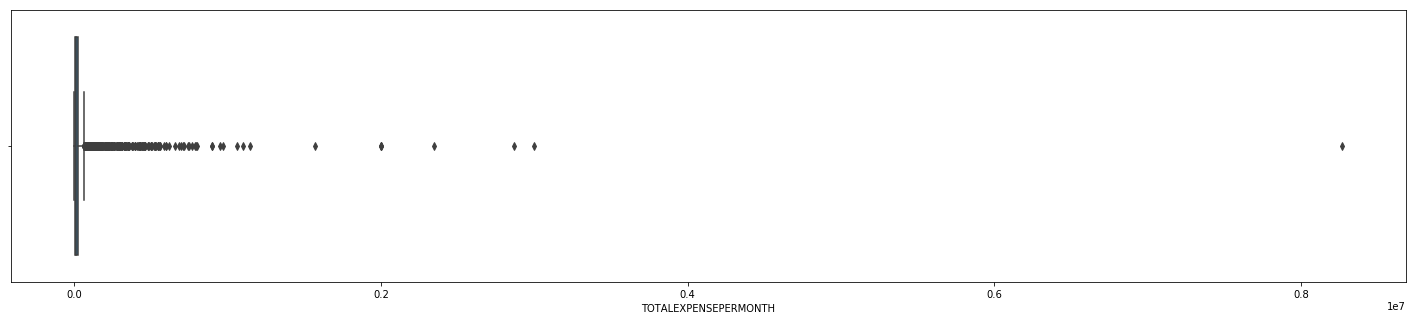

In [769]:
#Boxplot for TOTALEXPENSEPERMONTH
plt.figure(figsize=(25,5))
sns.boxplot(x=df_new["TOTALEXPENSEPERMONTH"])

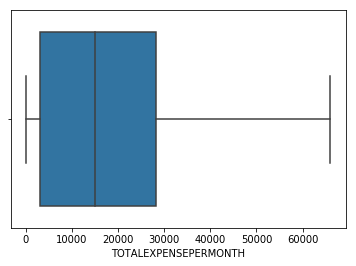

In [770]:
sns.boxplot(x="TOTALEXPENSEPERMONTH",data= df_new, showfliers=False)

**Description: Huge outliers on the right side of distribution**

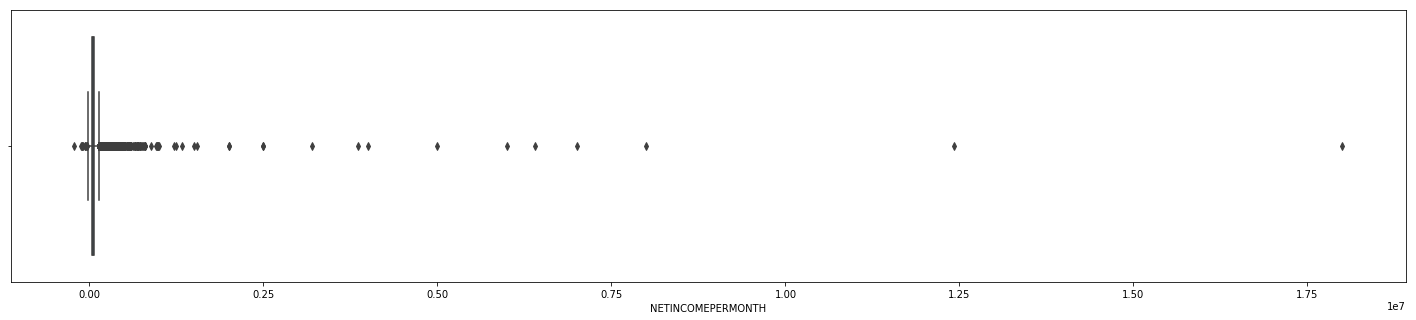

In [771]:
#Boxplot for NETINCOMEPERMONTH
plt.figure(figsize=(25,5))
sns.boxplot(x=df_new["NETINCOMEPERMONTH"])

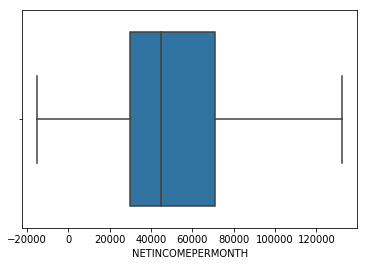

In [772]:
sns.boxplot(x="NETINCOMEPERMONTH",data= df_new, showfliers=False)

**Description : Huge Outliers on the right side of distribution.**

### Treatement of outliers:

In [773]:
df_new['ASSETCOST'].describe().T

count    9.871000e+03
mean     5.286979e+05
std      3.181258e+05
min      0.000000e+00
25%      3.000000e+05
50%      4.750000e+05
75%      6.500000e+05
max      7.200000e+06
Name: ASSETCOST, dtype: float64

In [774]:
#Replacing outlier in 'ASSETCOST' with median value of that column.

df_new['ASSETCOST'] = np.where(df_new['ASSETCOST']>6.500000e+05,4.750000e+05,df_new['ASSETCOST'])


In [775]:
df_new['LOANAMOUNT'].describe().T

count    9.871000e+03
mean     3.870171e+05
std      2.384892e+05
min      5.000000e+04
25%      2.242500e+05
50%      3.500000e+05
75%      5.000000e+05
max      3.512750e+06
Name: LOANAMOUNT, dtype: float64

In [776]:
#Replacing outlier in 'Loanamount' with 75th percentile value of that column.

df_new['LOANAMOUNT'] = np.where(df_new['LOANAMOUNT']>5.000000e+05,5.000000e+05,df_new['LOANAMOUNT'])

In [777]:
df_new['EMI'].describe().T

count      9871.000000
mean      12232.637423
std        6713.200199
min        1402.000000
25%        7750.500000
50%       11114.000000
75%       14918.000000
max      103000.000000
Name: EMI, dtype: float64

In [778]:
#Replacing outlier in 'EMI' with th mean value of that column
df_new['EMI'] = np.where(df_new['EMI']>14918.000000, 12232.232577,df_new['EMI'])

In [779]:
df_new['NOOFYEARSINSAMECITY'].describe().T

count    9871.000000
mean       26.650787
std        14.007604
min         0.000000
25%        20.000000
50%        26.000000
75%        35.000000
max       401.000000
Name: NOOFYEARSINSAMECITY, dtype: float64

In [780]:
#Replacing outlier in 'NOOFYEARSINSAMECITY' with th ,median value of that column
df_new['NOOFYEARSINSAMECITY'] = np.where(df_new['NOOFYEARSINSAMECITY']>35,26,df_new['NOOFYEARSINSAMECITY'])

In [781]:
df_new['TOTALEXPENSEPERMONTH'].describe().T

count    9.871000e+03
mean     2.829611e+04
std      1.184883e+05
min      0.000000e+00
25%      3.000000e+03
50%      1.500000e+04
75%      2.829611e+04
max      8.267919e+06
Name: TOTALEXPENSEPERMONTH, dtype: float64

In [782]:
#Replacing outlier in 'TOTALEXPENSEPERMONTH' with th ,mean value of that column
df_new['TOTALEXPENSEPERMONTH'] = np.where(df_new['TOTALEXPENSEPERMONTH']>2.829575e+04,2.829575e+04,df_new['TOTALEXPENSEPERMONTH'])

In [783]:
df_new['MONTHLYTURNOVER'].describe().T

count    9.871000e+03
mean     2.206023e+05
std      3.392246e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+04
max      2.100000e+08
Name: MONTHLYTURNOVER, dtype: float64

In [784]:
#Replacing outlier in 'MONTHLYTURNOVER' with th ,mean value of that column
df_new['MONTHLYTURNOVER'] = np.where(df_new['MONTHLYTURNOVER']>0.000000, 1923.502340 ,df_new['MONTHLYTURNOVER'])


In [785]:
df_new['NETINCOMEPERMONTH'].describe().T

count    9.871000e+03
mean     7.112645e+04
std      2.857724e+05
min     -2.200000e+05
25%      3.000000e+04
50%      4.500000e+04
75%      7.112645e+04
max      1.800000e+07
Name: NETINCOMEPERMONTH, dtype: float64

In [786]:
#Replacing outlier in 'MONTHLYTURNOVER' with th ,75th percentile value of that column
df_new['NETINCOMEPERMONTH'] = np.where(df_new['NETINCOMEPERMONTH']> 7.112327e+04,7.112327e+04,df_new['NETINCOMEPERMONTH'])


In [787]:
##removing outliers from the columns Income & CCAvg
a = df_new["NETINCOMEPERMONTH"].quantile(0.25)
b = df_new["NETINCOMEPERMONTH"].quantile(0.75)
IQR1 = b-a

df1_noout1 = df_new[~((df_new["NETINCOMEPERMONTH"] < (a - 1.5 * IQR1)) |(df_new["NETINCOMEPERMONTH"] > (b + 1.5 * IQR1)))]


print(df1_noout1.shape)





(9861, 38)


#### **The describe function showed the minimum value of NETINCOMEPERMONTH column as-220000. Hence we investigate further to check if there are  more negative values in the  column NETINCOMEPERMONTH **

In [788]:
##displaying all rows wtih negative values under the Experience column
dftemp = df1_noout1[(df1_noout1['NETINCOMEPERMONTH'] < 0)]  
dftemp.shape

(4, 38)

**Description:**
There are 4 rows with negative values under the NETINCOMEPERMONTH column. If we look closer, we can see that all these rows have the value 'ZERO' BUSINESSMARGINNET and STOCKVALUEINHAND columns which means that these persons have not good backup assets.

Under this circumstance, we have 3 options:

1)Replace all the negative values with some logical value based on the corresponding values of other respective columns.

2)Drop these rows entirely

3)check with the client if the actual values can be obtained.

Exploring option 1 - The task would be tedious & impractical as these columns may have siginficant impact on target variable.


Exploring option 2 - If we drop these rows and in the event that a false positive arises (when a potentioal bad is precidted by the model as a good customer), it is still not a loss to the bank.

Hence we decide to drop these 2 rows with negative values under the NETINCOMEPERMONTH
column.

In [789]:
##dropping the rows with Experience shown as negative values
df1_final = df1_noout1[df1_noout1["NETINCOMEPERMONTH"] >= 0]
df1_final.shape

(9857, 38)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213E5CBB940>,
      dtype=object)

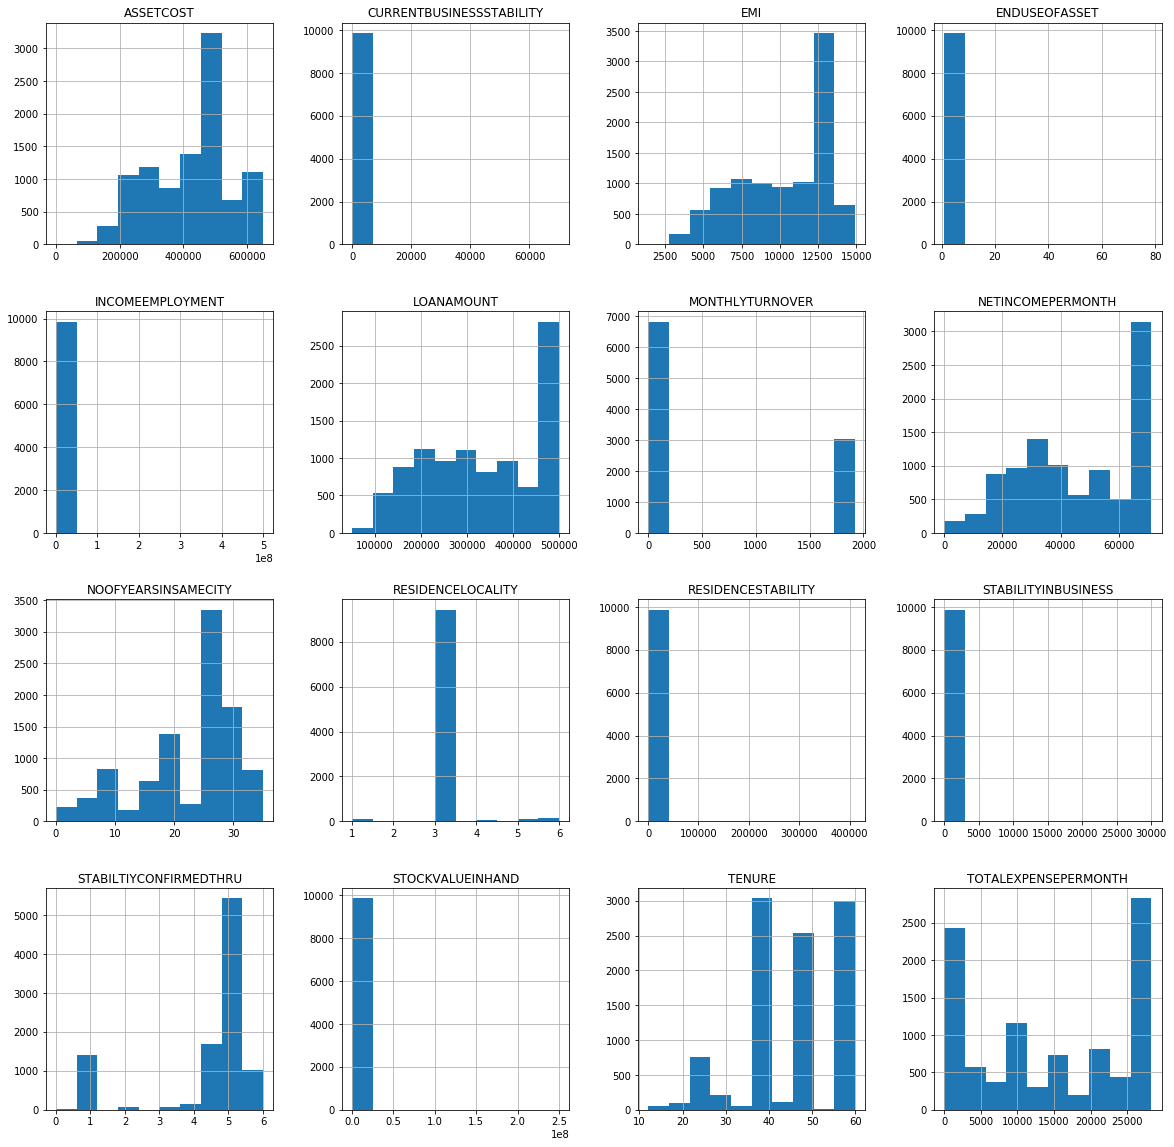

In [790]:
df1_final.hist(figsize=(20,20))

**Multivariate Analysis**

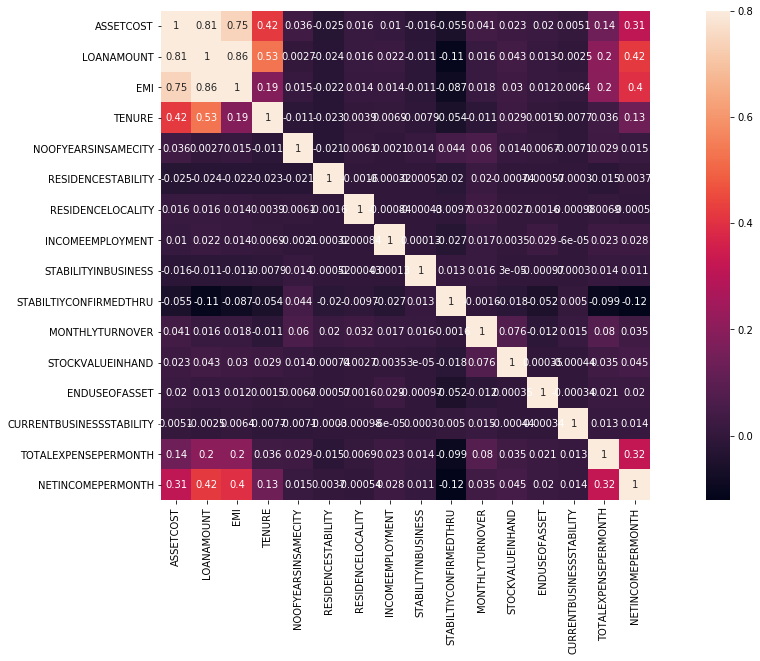

In [791]:
#correlation Matrix and Heatmap 

corr = df1_final.corr()
fig = plt.figure(figsize=(20,9))
sns.heatmap(corr,annot = True ,vmax = 0.8,square = True)
plt.show()

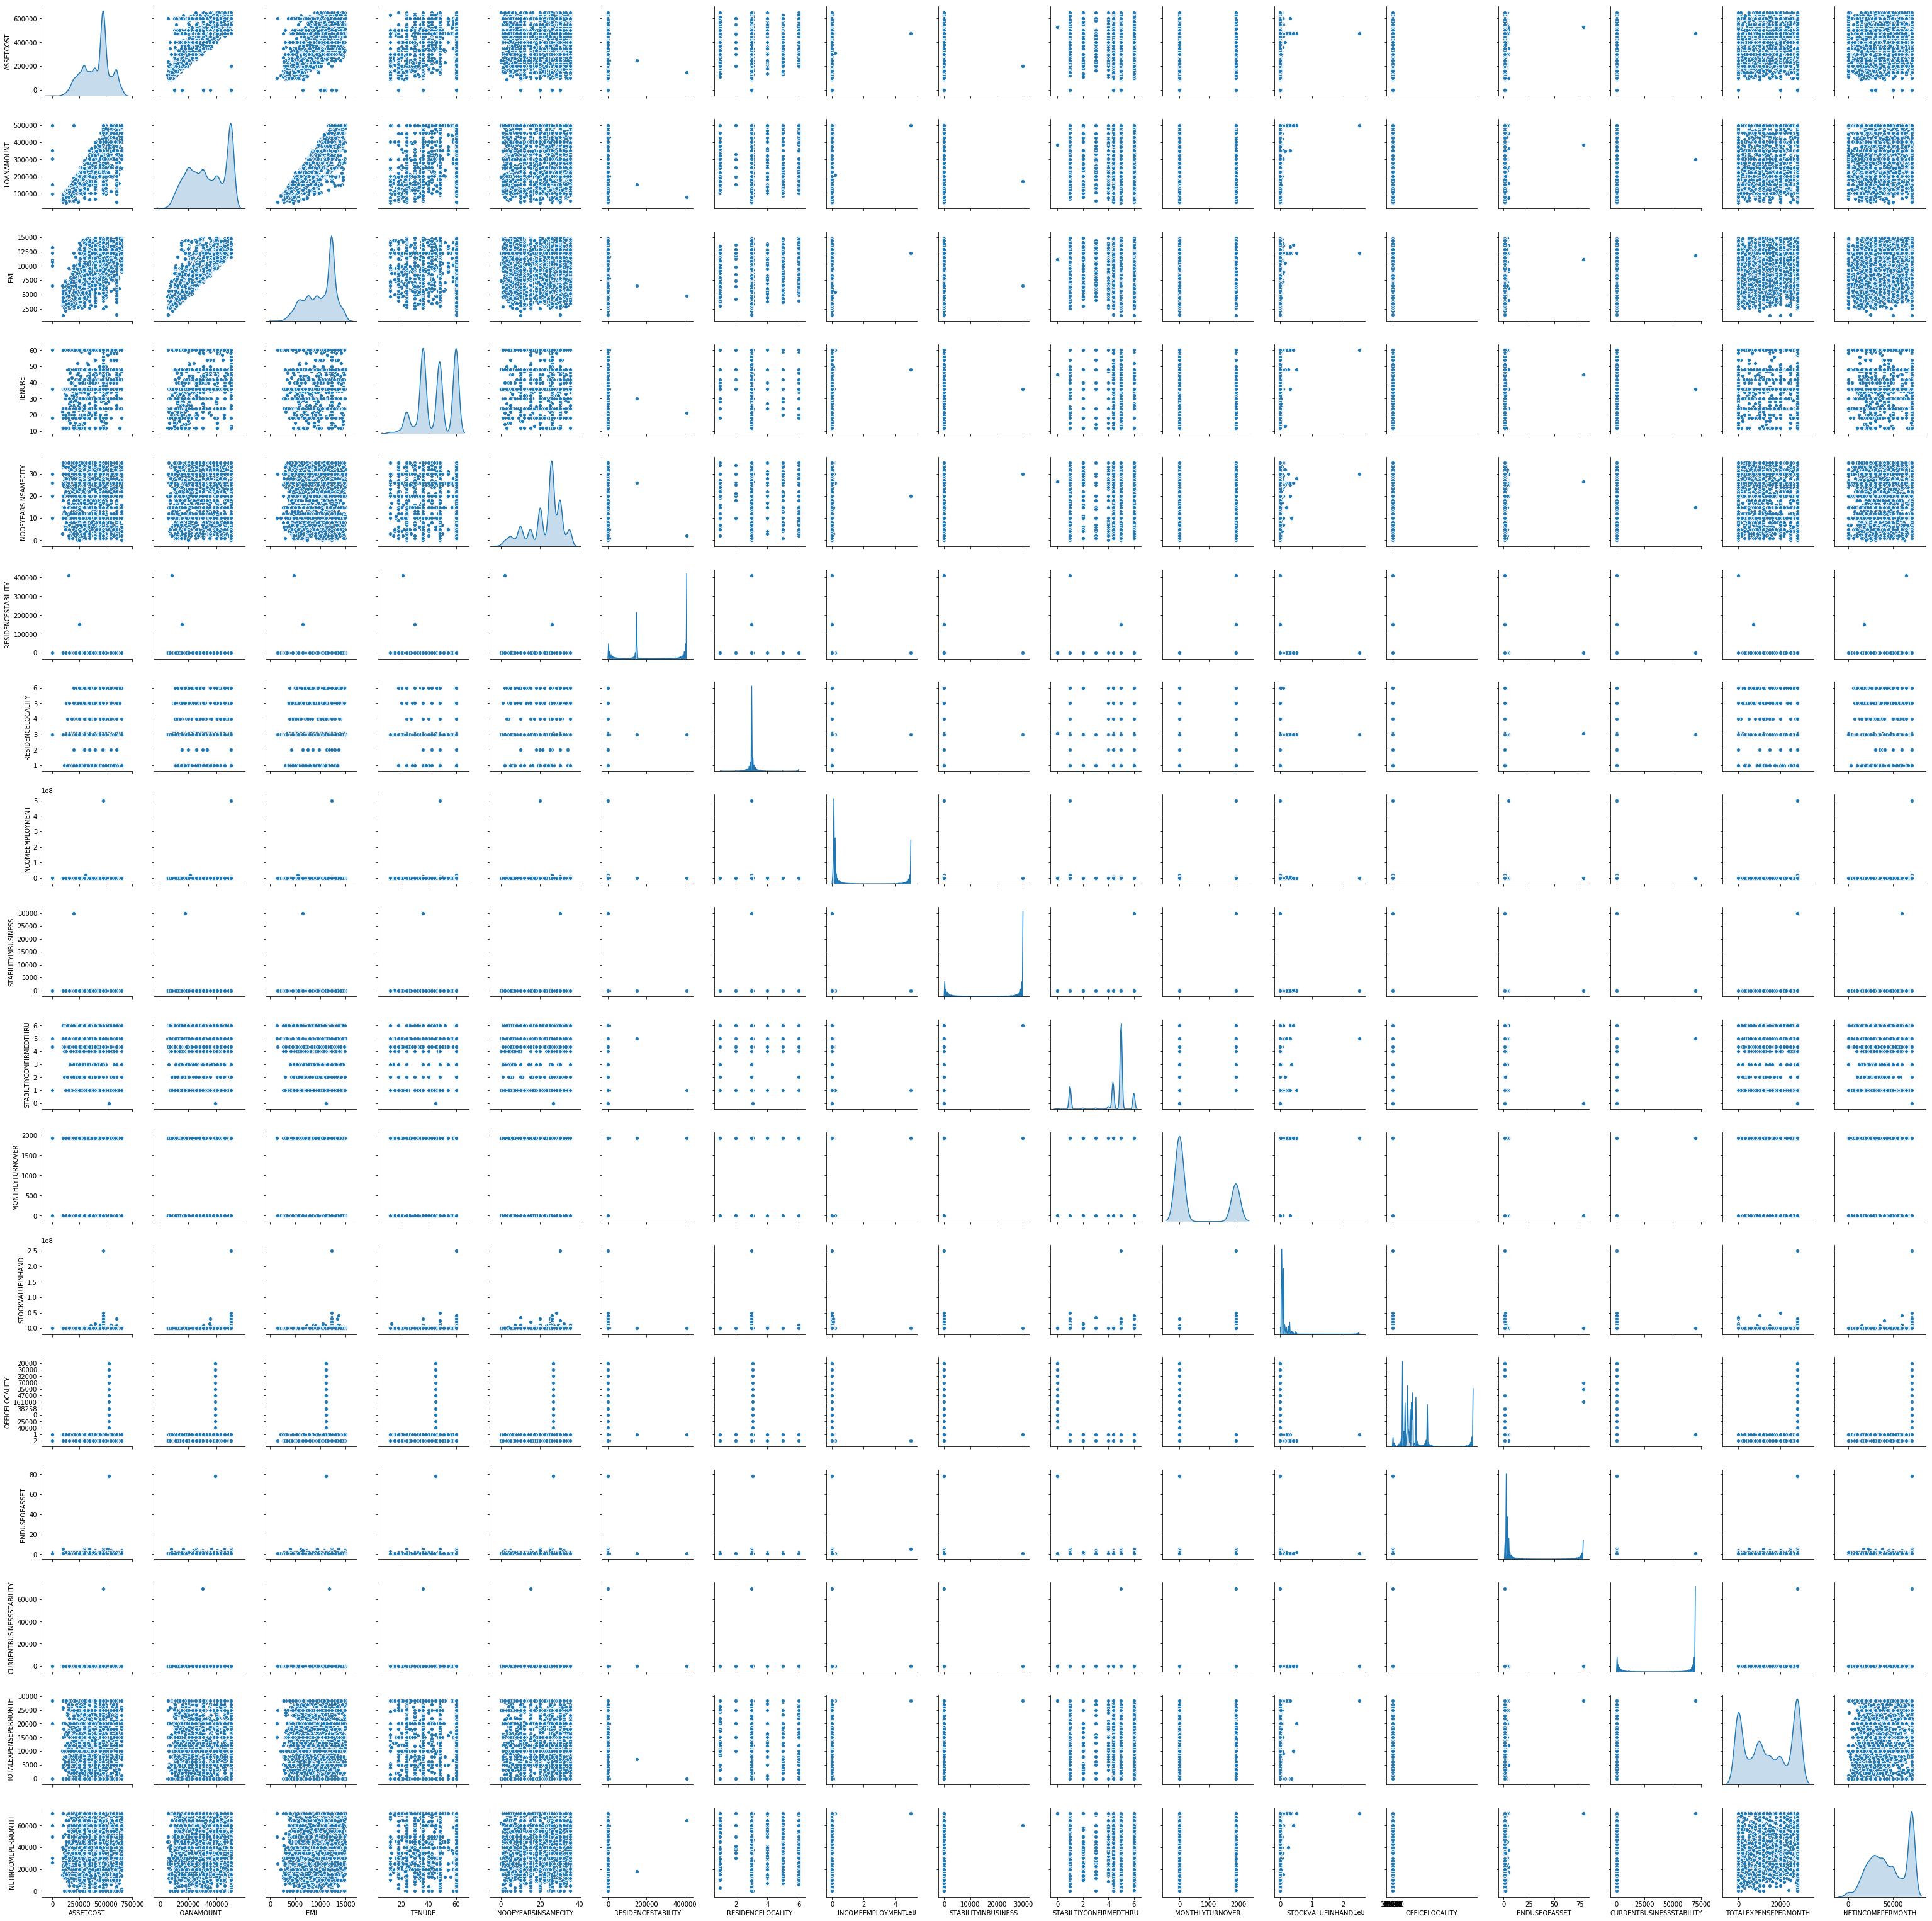

In [792]:
#One more multivariate analysis,here pairplot is used.

sns.pairplot(df1_final,diag_kind ='kde')

**Description : - As we can see from the above correlation Matrix, Heatmap and pairplot Assetcost, EMI and Loanamount are highly.**

**Applying Label Encoder to the Class variable**

In [866]:
#choosing only the categorical column
                                  

df2_final = df1_final.select_dtypes(exclude="number")
c = df2_final.columns ##choosing only the categorical variable columns

In [868]:
#importing Labelencoder from sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [870]:
##encoding is done on the slice containing non-numerical columns of the main dataframe 

le = LabelEncoder()
df1_final[c] = df1_final[c].apply(le.fit_transform)
df1_final[c].head()

,Good_Bad,LOCATIONNAME,VEHICLEMODEL,ADDRESSCONFIRMED,DESIGNATION,RESIDENCETYPE,BUSINESSCATEGORY,ISFAMILYINVOLVED,OFFICETYPE,BUSINESSMARGINNET,...,OFFICELOCALITY,ISRESIDENCECOMEOFFICE,ENDUSEOFLOAN,ASSETLOCATION,NEIGHBOURREF,POLITICALLINK,PROFESSIONTYPE,APPLICANTDESIGNATION,IMGCONFIRM,FOIR
0,0,51,375,1,65,2,5,2,2,0,...,3,15,1979,1168,1,0,4,1302,1,62
1,1,46,1420,1,516,1,5,2,2,0,...,1,16,1012,195,1,0,4,1225,1,73
2,1,53,1704,1,248,1,5,1,3,0,...,3,15,1102,1376,1,0,4,1325,1,62
3,1,4,250,1,456,1,5,1,2,13,...,3,15,1912,41,1,0,4,1325,1,64
4,0,53,1609,1,516,1,5,1,3,0,...,3,15,985,371,1,0,4,1583,1,133


#### Principle Component Analysis

In [883]:
#sklearn package for scaling
from sklearn.preprocessing import StandardScaler


#sklearn package for PCA
from sklearn.decomposition import PCA

In [884]:
#copy all predictors variables to dataframe X ,and drop dependent variable(target). 
X =  df1_final.drop('Good_Bad',axis = 1)

#copy the ' GoodBad 'column to dataframe y. This is the target column
y =  df1_final['Good_Bad']

In [885]:
#Splitting the data into train and test .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [886]:
#Scaling the data
sc = StandardScaler()


**Scaling the training & testing sets separately to avoid data loss to the model**

In [887]:
#scaling of taining data

X_train_scaled = sc.fit_transform(X_train)

In [888]:
#scaling of test data

X_test_scaled = sc.transform(X_test)

**Computing Eigen Vectors & the corresponding Eigen Values**


In [889]:
covMatrix = np.cov(X_train_scaled,rowvar=False)

In [890]:
from numpy import linalg as LA
eig_val, eig_vec = LA.eig(covMatrix)
eig_val

array([3.34607439, 2.2944386 , 1.80824656, 0.06168857, 1.58322891,
       0.23415101, 1.45476524, 1.39995479, 1.3331595 , 0.42369902,
       0.43381804, 0.46925084, 0.48426902, 0.56631826, 0.62043491,
       1.21138014, 0.65457674, 0.69597198, 0.71687989, 1.17003774,
       1.15290596, 0.77655072, 0.79151913, 0.79734933, 0.83009831,
       0.84742673, 0.87193811, 1.1039479 , 0.90707014, 1.05655769,
       0.93718764, 0.95450069, 0.97190094, 1.03206067, 1.02052868,
       0.98629046, 1.00518663])

In [893]:
eig_vec

array([[ 0.00907625,  0.07081956, -0.09636668, ...,  0.0200964 ,
        -0.0610259 , -0.06464553],
       [ 0.08682498,  0.0325351 , -0.00553276, ...,  0.31318066,
        -0.111859  ,  0.02765336],
       [ 0.45009012,  0.10862629,  0.13247135, ..., -0.0382285 ,
        -0.0080451 ,  0.02225055],
       ...,
       [ 0.21266345,  0.00933955, -0.20940463, ...,  0.03188291,
         0.10956736, -0.06121712],
       [ 0.31704557,  0.022441  , -0.13690008, ...,  0.02013146,
        -0.01466424,  0.11872942],
       [ 0.10656758,  0.04829184,  0.1317756 , ...,  0.0687117 ,
         0.03401778, -0.12328823]])

In [892]:
total_var = eig_val.sum()
sort_var = np.sort(eig_val)
sort_var[:] = sort_var[::-1]
sort_var

array([3.34607439, 2.2944386 , 1.80824656, 1.58322891, 1.45476524,
       1.39995479, 1.3331595 , 1.21138014, 1.17003774, 1.15290596,
       1.1039479 , 1.05655769, 1.03206067, 1.02052868, 1.00518663,
       0.98629046, 0.97190094, 0.95450069, 0.93718764, 0.90707014,
       0.87193811, 0.84742673, 0.83009831, 0.79734933, 0.79151913,
       0.77655072, 0.71687989, 0.69597198, 0.65457674, 0.62043491,
       0.56631826, 0.48426902, 0.46925084, 0.43381804, 0.42369902,
       0.23415101, 0.06168857])

**Calculation of the Cumulative Explained Variance for each attribute**
**

In [895]:
explained_variance = [0]
cumulative_var = [0]
cumulative_var_arr = [0]
id = np.linspace(1,38,num=38, dtype='int64')
for id, var in zip(id, sort_var):
    e_var = var/total_var * 100.0
    explained_variance.append(e_var)
    cumulative_var = cumulative_var + e_var
    cumulative_var_arr.append(cumulative_var)
    print('The cumulative explained variance until attribute %1.0f is %3.2f' %(id, cumulative_var))

The cumulative explained variance until attribute 1 is 9.04
The cumulative explained variance until attribute 2 is 15.24
The cumulative explained variance until attribute 3 is 20.13
The cumulative explained variance until attribute 4 is 24.41
The cumulative explained variance until attribute 5 is 28.34
The cumulative explained variance until attribute 6 is 32.12
The cumulative explained variance until attribute 7 is 35.72
The cumulative explained variance until attribute 8 is 39.00
The cumulative explained variance until attribute 9 is 42.16
The cumulative explained variance until attribute 10 is 45.28
The cumulative explained variance until attribute 11 is 48.26
The cumulative explained variance until attribute 12 is 51.11
The cumulative explained variance until attribute 13 is 53.90
The cumulative explained variance until attribute 14 is 56.66
The cumulative explained variance until attribute 15 is 59.38
The cumulative explained variance until attribute 16 is 62.04
The cumulative exp

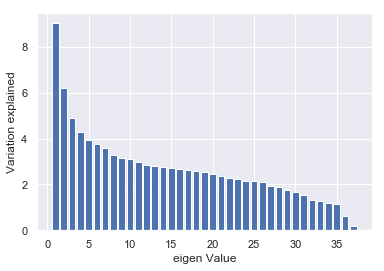

In [900]:
#Barplot for explained variance for all attributes

plt.bar(list(range(1,38)),explained_variance[1:], align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()


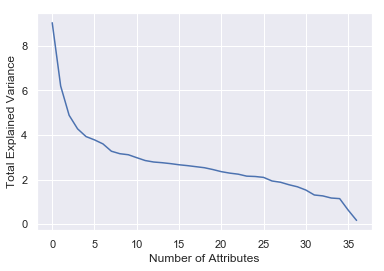

In [901]:
# Plot explained variance

plt.plot(explained_variance[1:])
plt.xlabel('Number of Attributes')
plt.ylabel('Total Explained Variance')
plt.show()

**Performing PCA with the 22 attributes**


In [905]:
#Fitting PCA components

pca = PCA(n_components=22)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=22, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [907]:
#Transforming the training & testing sets separately

X_train_sc_pca = pca.transform(X_train_scaled)

In [908]:
X_test_sc_pca = pca.transform(X_test_scaled)

In [909]:
#number of observations in pca's training and test set

print("PCA Training data", X_train_sc_pca.shape)
print("PCA Test Data",X_test_sc_pca.shape)

PCA Training data (6899, 22)
PCA Test Data (2958, 22)


In [910]:
pca.explained_variance_ratio_ 

array([0.09042133, 0.06200286, 0.0488644 , 0.0427834 , 0.03931214,
       0.03782424, 0.03602573, 0.03273287, 0.03161657, 0.03114572,
       0.02981731, 0.02854702, 0.02788654, 0.02755858, 0.02715691,
       0.02665127, 0.02623028, 0.02578698, 0.02509971, 0.02449131,
       0.02355424, 0.02287966])

In [912]:
Final_df = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6', 'PC7','PCA8'
                                                   ,'PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15',
                                                   'PCA16','PCA17','PCA18','PCA19','PCA20','PCA21','PCA22'])
Final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PCA8,PCA9,PCA10,...,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22
0,0.009084,-0.070776,0.096199,-0.034897,0.171220,-0.562674,-0.246257,-0.198764,0.053720,-0.048039,...,-0.009839,-0.023028,-0.063886,0.060474,0.101151,0.079698,0.099699,0.007109,0.056148,0.074314
1,0.086826,-0.032538,0.005539,-0.021205,0.016427,-0.066667,0.036636,0.178968,-0.147790,0.017399,...,0.177441,-0.313280,0.026341,0.112646,0.419674,-0.683846,-0.238807,0.024487,0.040998,0.023198
2,0.450089,-0.108621,-0.132510,0.048336,-0.125695,-0.095039,0.075110,-0.060836,0.007111,-0.104306,...,-0.027051,0.037526,0.022979,0.007017,-0.003212,0.048876,0.035798,0.019513,-0.031072,-0.009782
3,0.504453,-0.093206,-0.138686,0.024585,-0.098107,-0.041760,0.046793,-0.041899,0.015740,-0.061081,...,-0.027510,-0.002321,0.017788,0.011861,0.006642,-0.003916,0.001757,0.021049,-0.004245,-0.005893
4,0.458540,-0.110193,-0.087426,0.003712,-0.016071,-0.109821,0.065208,-0.016860,-0.046780,-0.017944,...,0.036198,-0.016281,0.034720,-0.012286,0.026408,0.032972,0.032969,-0.067679,0.036298,-0.105925
5,0.265941,-0.025766,-0.178313,0.059858,-0.221947,0.075562,0.004662,-0.081890,0.132809,-0.179605,...,-0.180531,0.094185,-0.025363,0.048576,-0.062159,-0.018623,-0.044141,0.192458,-0.103135,0.198390
6,-0.002084,0.006102,0.049331,-0.033054,-0.011067,-0.039360,-0.012045,-0.015624,-0.192460,0.087006,...,-0.675028,-0.095912,0.121932,0.187435,-0.316420,-0.376870,0.178419,0.022369,-0.012882,-0.012827
7,-0.045445,-0.005161,-0.132980,0.161917,-0.234850,0.116526,-0.226132,-0.142845,0.425959,0.231023,...,0.052699,0.108667,-0.044401,-0.027923,0.011557,-0.203733,0.157676,-0.011052,-0.133213,0.060105
8,0.052088,0.182684,-0.064574,-0.322525,0.271717,0.020718,0.335982,-0.023910,0.221153,0.025268,...,-0.118074,0.063421,-0.099185,0.008169,-0.038381,-0.112569,0.065941,0.043477,-0.203102,0.034882
9,-0.012103,-0.195100,0.195901,0.219282,-0.179333,-0.008851,-0.284262,0.089293,-0.335395,-0.003085,...,-0.127899,0.064154,0.037468,-0.088840,0.114501,-0.009086,0.125839,0.022483,0.023173,0.026127


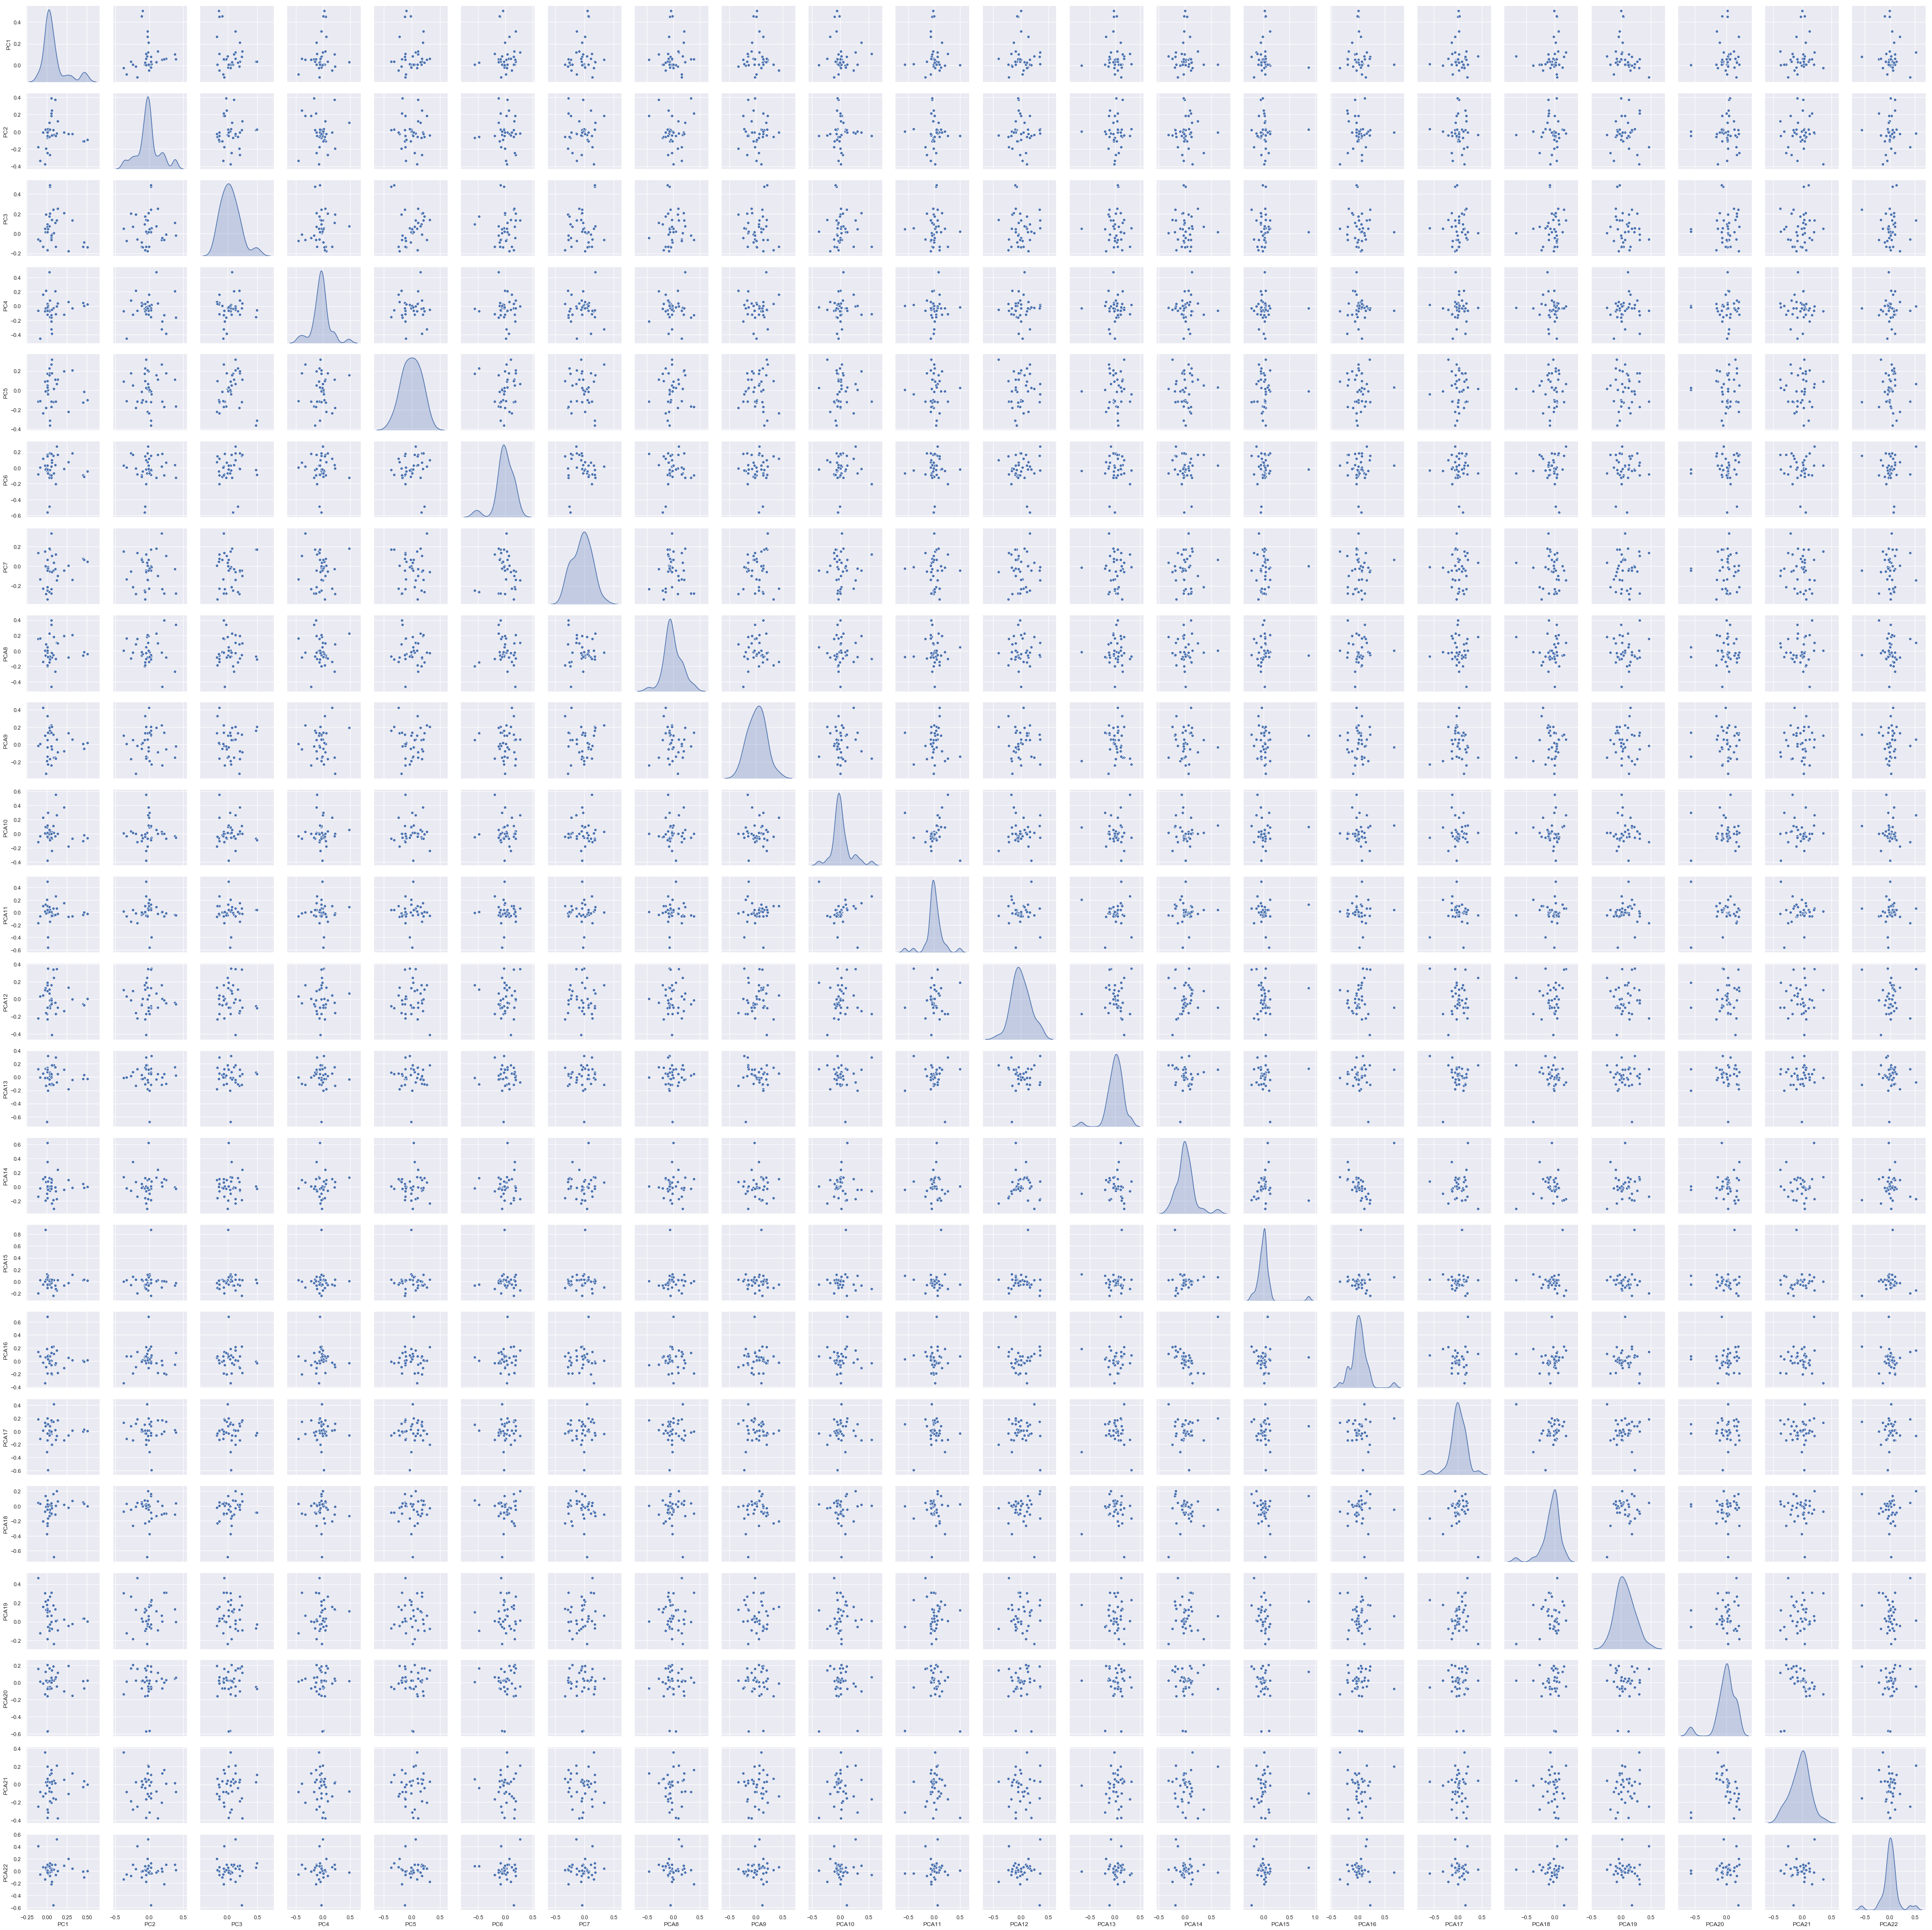

In [913]:
#visual representation of all PCs.

sns.pairplot(Final_df, diag_kind = 'kde')


### Deliverable 3 : Insights:

1) Given Dataset was so noisy ,it contains both wrong and null entries.

2) There were initialy 10000 records ,6752 are labeled as good customers and 3248 as Bad customers.

3) There was huge need of data cleaning as there exist many outliers and missig values.

4)  A very interesting insight i've got by close analysis of dataset is that there are total of 128 observations which has a    null value in every column. So  i have dropped those observations by using the feature ' LOCATIONNAME'.

5) There are  observations which contaings lovcationname as 4 ,7 ,8 and 708, There are approaches to deal with these type problem :
 
 **Approach 1 :** Replace these with some logical values.
 **Approach 2 :** Drop these 4 rows.
 
 I used approach 2  because it's a categorical column(locationname) and it would not be a good idea to replace with any of other value.
 
 6) There is an observation which has 708 in every column ,so dropping is necessary.
 
 7) There are few columns in the datset which is either not useful for model building or having no values.
 **Useless :** UID and CUSTOMER_PROFILE_CODE.
 **Columns with no values or almost zer0:** 'ASSETREGMONTH','LANDOWNERSHIP','IRRIGATIONSOURCE','CROPSCULTIVATED','STABILITYCONFIRMED',
                         'BUSINESSMARGINGROSS','DISTFROMSCELOCATION','DISTFROMDEALERLOCATION','ASSETREGYEAR'.
                         
 8)**Treatment of outliers :**
 **Approach 1-**  Drop all the rows containing outliers - which can more tha 15% of data.

Approach 2 - Replace outlier with quartile values (0.75,median,mean) 
**Description - I have applied both the approaches in this notebook beacause if we would apply only approach 1 there might be loss of huge data which we cannot afford as it is good practice to have as much data as possible for our model's good accuracy .

By following both the approaches we have drop only and after all dropping and replacing process we have a loss of only 143 observations which is quiet low(**Drop of less than 10% of data is fine with every ML model**).

9) Principle Component Analysis has applied to extract all the significant features.By the output of explained_variance It can be seen  that 95% of the variance is explained by 22 attributes.

10) To do PCA we need to scale our data so i used Standardscaler for this task.

11) **There is a correlation between  ASSETCOST, EMI and Loanamount .**

12) By the analysis of dataset itself i have found Residencstability ,ISfamilyinvolved are significant columns for identification of good customers.

13) There are few entries in designation column whose meanings are not clear.(like some names and relitves).And actual meaning of the feature is also not clear in the problem statement.

14) BUSINESSMARGINGROSS ansd STOCKVALUEINHAND have maximum of zeros.

15) TOTALEXPENSEPERMONTH is seems to be significant cloumn for identifying good or bad customer as most of the customer who are labeled as bad customer have either zero value or lesser value than the good customers labels.




### Thank You:
